# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz
# import os
# import time

Using PATH_TO_CLASS_SZ_DATA: /Users/boris/class_sz_data_directory
Found class_sz_data_directory directory with all repositories at: /Users/boris/class_sz_data_directory
PATH_TO_CLASS_SZ_DATA is already correctly set.
Required directories already exist. Skipping download.


In [2]:
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   

}


# Compute H(z)

In [3]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':' ',
'skip_hubble':0,
})

CPU times: user 236 µs, sys: 24 µs, total: 260 µs
Wall time: 272 µs


True

In [4]:
%%time
classy_sz.compute_class_szfast()

CPU times: user 341 ms, sys: 11.8 ms, total: 353 ms
Wall time: 167 ms


In [5]:
classy_sz.get_H(0.)

0.00033359796437495265

In [6]:
classy_sz.Hubble(1.)

0.0004023684284735257

In [7]:
classy_sz.get_hubble_at_z(1,params_values_dict = cosmo_params)

array(0.00040237)

# Plot H(z)

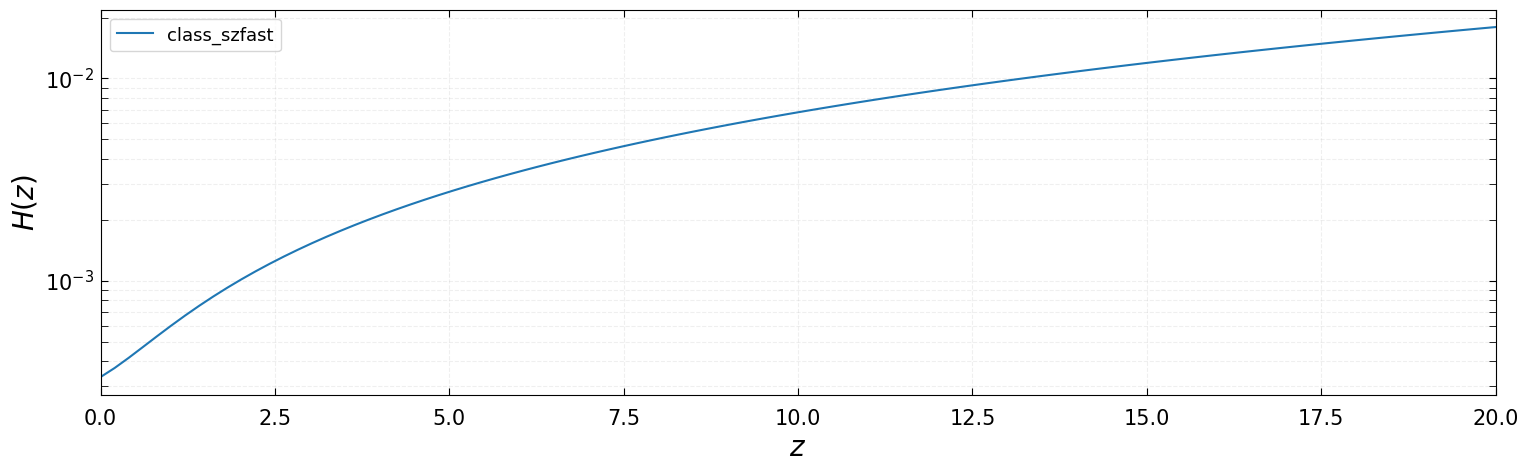

In [8]:
label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(18,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


z = np.linspace(0.,20,100)

ax.plot(z,classy_sz.get_H(z),ls='-',label='class_szfast')






ax.set_ylabel(r"$H(z)$",size=title_size)
ax.set_xlabel(r"$z$",size=title_size)
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlim(0,20)
ax.legend(fontsize=legend_size)



# Time computations of H(z)

In [9]:
%timeit -n 40  classy_sz.compute_class_szfast()

The slowest run took 4.68 times longer than the fastest. This could mean that an intermediate result is being cached.
19.6 ms ± 8.12 ms per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [10]:
z = np.linspace(0.,20,1000)
%timeit -n 40  classy_sz.get_H(z)

8.32 ms ± 314 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [11]:
classy_sz.get_H(z)[0]*classy_sz.h()

0.00022571238269609295

In [12]:
z = np.linspace(0.,20,1000)
%timeit -n 40  classy_sz.Hubble(z)

6.89 ms ± 408 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [13]:
classy_sz.Hubble(z)[0]

0.00022571238269609295

In [14]:
# let's time it 
z = np.linspace(0.,20,1000)
%timeit -n 40  classy_sz.get_hubble_at_z(z,params_values_dict = cosmo_params)

6.34 ms ± 591 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [15]:
classy_sz.get_hubble_at_z(z,params_values_dict = cosmo_params)[0]

0.00022571238269609295

Here we can now update cosmological parameters and recompute.

A strategy can be to initialize classy_sz and then recompute as here. 

In [16]:
cosmo_params.update({'H0':72.})

In [17]:
classy_sz.get_hubble_at_z(z,params_values_dict = cosmo_params)[0]

0.00024019108300278296

In [18]:
%timeit -n 40  classy_sz.get_hubble_at_z(z,params_values_dict = cosmo_params)[0]

6.51 ms ± 639 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


# Comparison without emulators

In [1]:
from classy_sz import Class as Class_sz
import numpy as np

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'N_ur' :0.00441, # this is the default value in class v3 to get Neff = 3.044
'N_ncdm':  1,
'm_ncdm': 0.02,
'deg_ncdm': 3

}

Using PATH_TO_CLASS_SZ_DATA: /Users/boris/class_sz_data_directory
Found class_sz_data_directory directory with all repositories at: /Users/boris/class_sz_data_directory
PATH_TO_CLASS_SZ_DATA is already correctly set.
Required directories already exist. Skipping download.


In [2]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':' ',
'skip_background_and_thermo':0,
})
classy_sz.compute()

CPU times: user 62.7 ms, sys: 4.78 ms, total: 67.5 ms
Wall time: 71.9 ms


In [3]:
classy_sz.Hubble(1.)

0.00040234621947652185

In [4]:
z = np.linspace(0.,20,1000)
%timeit -n 40  classy_sz.Hubble(z)

477 µs ± 159 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [5]:
classy_sz.Hubble(z)[0]

0.00022568946681106967

# Compute with Jax

In [1]:
from classy_sz import Class as Class_sz
import jax.numpy as jnp

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   

}

Using PATH_TO_CLASS_SZ_DATA: /Users/boris/class_sz_data_directory
Found class_sz_data_directory directory with all repositories at: /Users/boris/class_sz_data_directory
PATH_TO_CLASS_SZ_DATA is already correctly set.
Required directories already exist. Skipping download.


In [2]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':' ',
'skip_hubble':0,
'jax' : 1,
# 'skip_input': 1,
})

CPU times: user 51 µs, sys: 56 µs, total: 107 µs
Wall time: 110 µs


True

In [3]:
%%time
classy_sz.compute_class_szfast()

CPU times: user 413 ms, sys: 1.1 s, total: 1.51 s
Wall time: 440 ms


In [4]:
z = 1.
classy_sz.get_hubble_at_z(z,params_values_dict = cosmo_params)

Array(0.00040237, dtype=float64)

In [5]:
cosmo_params.update({'H0':72.})
"%.25f"%classy_sz.get_hubble_at_z(z,params_values_dict = cosmo_params)

'0.0004106620973760160566400'

In [6]:
cosmo_params.update({'H0':70.})
"%.25f"%classy_sz.get_hubble_at_z(z,params_values_dict = cosmo_params)

'0.0004067974877159367843964'

In [8]:
"%.25f"%classy_sz.Hubble(1.)[0]

'0.0004067974877159367843964'

In [9]:
z = jnp.linspace(1.,20,1000)
"%.25f"%classy_sz.Hubble(z)[0]

'0.0004067974877159367843964'

## Jax test

In [10]:

import jax

z = jnp.linspace(1., 20, 1000)
hubble_values = classy_sz.Hubble(z)

# Check if it's a JAX array
is_jax_array = isinstance(hubble_values, jnp.ndarray)

# Additional check: apply a JAX function to see if it supports JAX transformations
try:
    jitted_hubble = jax.jit(classy_sz.Hubble)(z)
    supports_jit = True
except Exception as e:
    supports_jit = False
    print("Error with jax.jit:", e)

print("Is Hubble(z) a JAX array?", is_jax_array)
print("Does Hubble(z) support JAX jit?", supports_jit)


Is Hubble(z) a JAX array? True
Does Hubble(z) support JAX jit? True


In [11]:
hubble_values = classy_sz.get_hubble_at_z(z,params_values_dict = cosmo_params)
is_jax_array = isinstance(hubble_values, jnp.ndarray)
print("Is get_hubble_at_z a JAX array?", is_jax_array)

Is get_hubble_at_z a JAX array? True
